In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

In [2]:
results_wHist = pd.read_csv('/data/groups/epa1/mlpolicylab_fall20_epa1/Pipeline/experiments/grid_import_201209_0315_with_history_final_grid/with_grid_result_top21%.csv')
results_woHist = pd.read_csv('/data/groups/epa1/mlpolicylab_fall20_epa1/Pipeline/experiments/grid_import_201209_2127_without_history_final_grid/without_grid_result_top21%.csv')

In [3]:
results_wHist['2009'] = results_wHist['precision_overtime'].str.split(';').str[0].astype(float)
results_wHist['2010'] = results_wHist['precision_overtime'].str.split(';').str[1].astype(float)
results_wHist['2011'] = results_wHist['precision_overtime'].str.split(';').str[2].astype(float)
results_wHist['2012'] = results_wHist['precision_overtime'].str.split(';').str[3].astype(float)
results_wHist['2013'] = results_wHist['precision_overtime'].str.split(';').str[4].astype(float)
results_wHist['2014'] = results_wHist['precision_overtime'].str.split(';').str[5].astype(float)

results_woHist['2009'] = results_woHist['precision_overtime'].str.split(';').str[0].astype(float)
results_woHist['2010'] = results_woHist['precision_overtime'].str.split(';').str[1].astype(float)
results_woHist['2011'] = results_woHist['precision_overtime'].str.split(';').str[2].astype(float)
results_woHist['2012'] = results_woHist['precision_overtime'].str.split(';').str[3].astype(float)
results_woHist['2013'] = results_woHist['precision_overtime'].str.split(';').str[4].astype(float)
results_woHist['2014'] = results_woHist['precision_overtime'].str.split(';').str[5].astype(float)

In [4]:
results_wHist['s2009'] = results_wHist['support_overtime'].str.split(';').str[0].astype(float)
results_wHist['s2010'] = results_wHist['support_overtime'].str.split(';').str[1].astype(float)
results_wHist['s2011'] = results_wHist['support_overtime'].str.split(';').str[2].astype(float)
results_wHist['s2012'] = results_wHist['support_overtime'].str.split(';').str[3].astype(float)
results_wHist['s2013'] = results_wHist['support_overtime'].str.split(';').str[4].astype(float)
results_wHist['s2014'] = results_wHist['support_overtime'].str.split(';').str[5].astype(float)

results_woHist['s2009'] = results_woHist['support_overtime'].str.split(';').str[0].astype(float)
results_woHist['s2010'] = results_woHist['support_overtime'].str.split(';').str[1].astype(float)
results_woHist['s2011'] = results_woHist['support_overtime'].str.split(';').str[2].astype(float)
results_woHist['s2012'] = results_woHist['support_overtime'].str.split(';').str[3].astype(float)
results_woHist['s2013'] = results_woHist['support_overtime'].str.split(';').str[4].astype(float)
results_woHist['s2014'] = results_woHist['support_overtime'].str.split(';').str[5].astype(float)

In [5]:
data_wHist = results_wHist[['2009','2010','2011','2012','2013','2014']].T

In [6]:
data_woHist = results_woHist[['2009','2010','2011','2012','2013','2014']].T

In [7]:
# reshape dataframes
# with history
melted_wHist = pd.melt(results_wHist, id_vars=['model_name','s2009','s2010','s2011','s2012','s2013','s2014'], value_vars=['2009','2010','2011','2012','2013','2014']).rename(columns={'variable': 'validation_year', 'value': 'precision@5percent'})
melted_wHist = pd.melt(melted_wHist, id_vars=['model_name', 'validation_year', 'precision@5percent'], value_vars=['s2009','s2010','s2011','s2012','s2013','s2014']).rename(columns={'value': 'support'}).drop(columns=['variable'])
melted_wHist['model_type'] = melted_wHist['model_name'].str.split('_').str[0]

# without history
melted_woHist = pd.melt(results_woHist, id_vars=['model_name','s2009','s2010','s2011','s2012','s2013','s2014'], value_vars=['2009','2010','2011','2012','2013','2014']).rename(columns={'variable': 'validation_year', 'value': 'precision@5percent'})
melted_woHist = pd.melt(melted_woHist, id_vars=['model_name', 'validation_year', 'precision@5percent'], value_vars=['s2009','s2010','s2011','s2012','s2013','s2014']).rename(columns={'value': 'support'}).drop(columns=['variable'])
melted_woHist['model_type'] = melted_woHist['model_name'].str.split('_').str[0]

In [8]:
# empty dataframes
br_df_woHist = pd.DataFrame()
br_df_wHist = pd.DataFrame()

bl_df_woHist = pd.DataFrame()
bl_df_wHist = pd.DataFrame()

In [9]:
# add base rate
br_df_woHist['validation_year'] = [2009, 2010, 2011, 2012, 2013, 2014]
br_df_woHist['precision@5percent'] = [0.444444444444444, 0.424083769633508, 0.38, 0.274881516587678, 0.486301369863014, 0.486486486486487]
br_df_woHist['support'] = [0.1640625, 0.0962701612903226, 0.12998266897747, 0.141705842847549, 0.0693586698337292, 0.060378590078329]
br_df_woHist['model_name'] = 'base_rate'
br_df_woHist['model_type'] = 'base_rate'

br_df_wHist['validation_year'] = [2009, 2010, 2011, 2012, 2013, 2014]
br_df_wHist['precision@5percent'] = [0.463414634146341, 0.438202247191011, 0.404255319148936, 0.426229508196721, 0.4, 0.416666666666667]
br_df_wHist['support'] = [0.416243654822335, 0.5, 0.487046632124352, 0.365269461077844, 0.48780487804878, 0.378378378378378]
br_df_wHist['model_name'] = 'base_rate'
br_df_wHist['model_type'] = 'base_rate'

# add commonsense baseline
bl_df_woHist['validation_year'] = [2009, 2010, 2011, 2012, 2013, 2014]
bl_df_woHist['precision@5percent'] = [0.5247524752475248, 0.4819277108433735, 0.47115384615384615, 0.40441176470588236, 0.48148148148148145, 0.4928909952606635]
bl_df_woHist['support'] = [0.3568904593639576, 0.3656387665198238, 0.36879432624113473, 0.3919308357348703, 0.334020618556701, 0.30579710144927535]
bl_df_woHist['model_name'] = 'commonsense_bl'
bl_df_woHist['model_type'] = 'commonsense_bl'

bl_df_wHist['validation_year'] = [2009, 2010, 2011, 2012, 2013, 2014]
bl_df_wHist['precision@5percent'] = [0.5247524752475248, 0.4819277108433735, 0.47115384615384615, 0.40441176470588236, 0.48148148148148145, 0.4928909952606635]
bl_df_wHist['support'] = [0.3568904593639576, 0.3656387665198238, 0.36879432624113473, 0.3919308357348703, 0.334020618556701, 0.30579710144927535]
bl_df_wHist['model_name'] = 'commonsense_bl'
bl_df_wHist['model_type'] = 'commonsense_bl'

In [10]:
melted_wHist = melted_wHist.append(br_df_wHist)
melted_wHist = melted_wHist.append(bl_df_wHist)

melted_woHist = melted_woHist.append(br_df_woHist)
melted_woHist = melted_woHist.append(bl_df_woHist)

melted_wHist['validation_year'] = melted_wHist['validation_year'].astype(int)
melted_woHist['validation_year'] = melted_woHist['validation_year'].astype(int)

In [11]:
sns.set_theme()

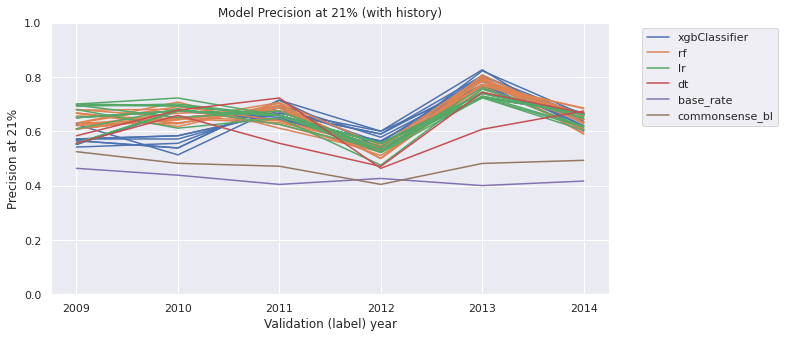

In [12]:
# plot all models
# with history
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(0,1)
ax.set_title('Model Precision at 21% (with history)')
ax.set_xlabel('Validation (label) year')
ax.set_ylabel('Precision at 21%')
sns.lineplot(x='validation_year', y='precision@5percent', data=melted_wHist,
             hue='model_type', units='model_name', estimator=None, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

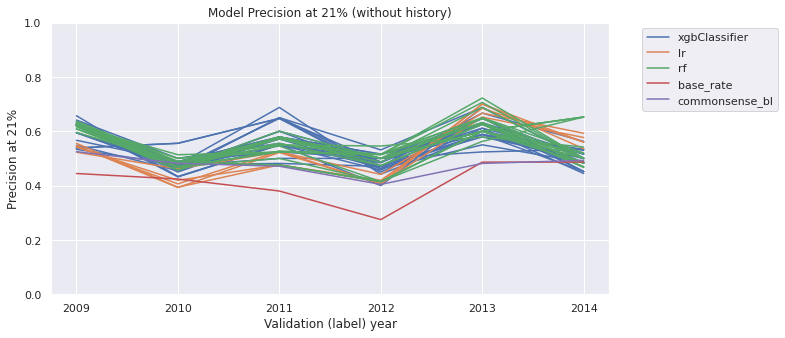

In [13]:
# plot all models
# with history
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(0,1)
ax.set_title('Model Precision at 21% (without history)')
ax.set_xlabel('Validation (label) year')
ax.set_ylabel('Precision at 21%')
sns.lineplot(x='validation_year', y='precision@5percent', data=melted_woHist,
             hue='model_type', units='model_name', estimator=None, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [14]:
best_with = ['lr_36', 'base_rate', 'commonsense_bl']
best_wHist = melted_wHist[melted_wHist['model_name'].isin(best_with)]

best_wo = ['xgbClassifier_97', 'base_rate', 'commonsense_bl']
best_woHist = melted_woHist[melted_woHist['model_name'].isin(best_wo)]

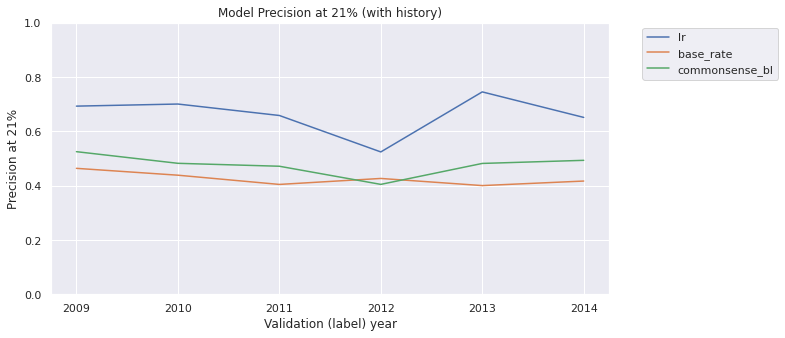

In [15]:
# plot best models
# with history
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(0,1)
ax.set_title('Model Precision at 21% (with history)')
ax.set_xlabel('Validation (label) year')
ax.set_ylabel('Precision at 21%')
sns.lineplot(x='validation_year', y='precision@5percent', data=best_wHist,
             hue='model_type', units='model_name', estimator=None, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

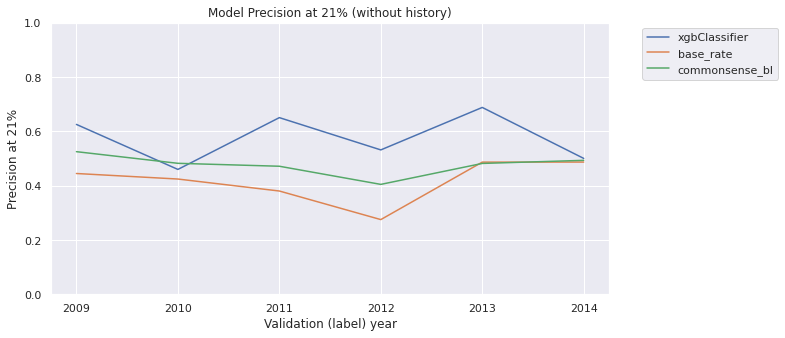

In [16]:
# plot best model
# without history
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(0,1)
ax.set_title('Model Precision at 21% (without history)')
ax.set_xlabel('Validation (label) year')
ax.set_ylabel('Precision at 21%')
sns.lineplot(x='validation_year', y='precision@5percent', data=best_woHist,
             hue='model_type', units='model_name', estimator=None, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')